In [1]:
import numpy as np 
from On_FV_MC_agent_esoft2 import OnPolicy_esoft_FirstVisit_MC_Agent
from SARSA_agent import SARSA_Agent
from Two_step_Exp_SARSA_agent import Two_step_Exp_SARSA_Agent
from Double_Q_Learning_agent import Double_Q_Learning_Agent
from nStep_tree_backup_agent import nStep_tree_backup_Agent
from Off_MC_agent import OffPolicy_MC_Agent
from tqdm import tqdm 
import matplotlib.pyplot as plt
import  random 


In [2]:
!pip3 install box2d-py
!pip3 install gym[Box_2D]
import gym

  Using cached box2d-py-2.3.8.tar.gz (374 kB)
  Running setup.py clean for box2d-py
Failed to build box2d-py
    Running setup.py install for box2d-py: started
    Running setup.py install for box2d-py: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\karbar\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\karbar\\AppData\\Local\\Temp\\pip-install-9_d33r52\\box2d-py_8c2fdfc5bab54b2093e7ec776ec3773e\\setup.py'"'"'; __file__='"'"'C:\\Users\\karbar\\AppData\\Local\\Temp\\pip-install-9_d33r52\\box2d-py_8c2fdfc5bab54b2093e7ec776ec3773e\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\karbar\AppData\Local\Temp\pip-wheel-z0gt_sos'
       cwd: C:\Users\karbar\AppData\Local\Temp\pip-install-9_d33r52\box2d-py_8c2fdfc5bab54b2093e7ec776ec3773e\
  Complete output (16 lines):
  Using setuptools (version 51.0.0.post20201207).
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  creating build\lib.win-amd64-3.7\Box2D
  copying li

In [3]:
env = gym.make("LunarLander-v2")
env.reset()
env.render()

for _ in range(4):
    action = env.action_space.sample()
    state, reward, done, info = env.step(action) # Take a random action
    print(info)
    print('action:',action)
    env.render()
env.close()


{}
action: 0
{}
action: 0
{}
action: 0
{}
action: 0


In [5]:
def Generate_episode(agent,init_state):
    episode = []
    rewards = []
    n_done = 0
    agent.set_current_state(init_state)
    while n_done != 2: 
        s = agent.get_current_state()
        state, reward, done, info , action = agent.take_action()
        #print(s,state, reward, done, info , action)
        episode.append((s,action))
        rewards.append(reward)
        n_done += int(done)
    #print(rewards[-1])
    return episode,rewards 

# On Policy MC

In [9]:
random.seed(2045)
env = gym.make("LunarLander-v2")
env.reset()

gamma = 0.999
episodes = 2000
states = list(range(100))
actions = [0,1,2,3]
Rewards =[]
mean_Rewards = []
Win_Rew_on_MC = []

agent = OnPolicy_esoft_FirstVisit_MC_Agent('1',env,states,actions,epsilon = 0.5,dec_eps=[9,100,1]) #epsilon decay???
for e in range(episodes):
    print("-"*25,"This is episode {} ".format(e),"-"*25,"\n")
    env.reset()

    episode, rewards = Generate_episode(agent, init_state = 44 )
    print("The number of steps in episode is : {}".format(len(episode)-1))
    G = 0
    for t in range(len(episode)-1,-1,-1):
        G = gamma * G + rewards[t] 
        if episode[t] not in episode[:t-1]:
            agent.update(G,state = episode[t][0], action = episode[t][1])

    agent.decay_epsilon()
    Rewards.append(sum(rewards))
    mean_Rewards.append(sum(rewards)/(len(episode)-1))
    if e >= 100 : Win_Rew_on_MC.append((sum(rewards)+sum(Rewards[e-100:e]))/101)
    else: Win_Rew_on_MC.append(sum(rewards))

    print("The sum of Rewards is : {} ".format(sum(rewards)),"\n" )
env.close()

------------------------- This is episode 0  ------------------------- 



TypeError: unhashable type: 'numpy.ndarray'

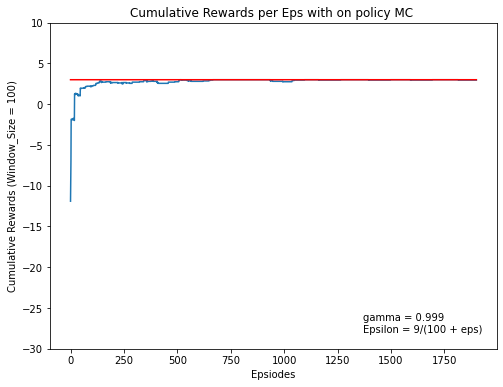

In [8]:
fig, ax = plt.subplots(1,1,figsize = (8,6))
ax.plot(Win_Rew_on_MC[100:])
ax.plot([3]*1900,'r')
ax.set_ylim((-30,10))
ax.set_xlabel("Epsiodes")
ax.set_ylabel("Cumulative Rewards (Window_Size = 100)")
ax.set_title("Cumulative Rewards per Eps with on policy MC ")
ax.text(x = 0.7, y = 0.05, s ="gamma = 0.999 \nEpsilon = 9/(100 + eps)", transform=ax.transAxes)
plt.show()

# Off Policy MC 

In [8]:
random.seed(2045)
env =  GridworldEnv()
env.reset()

gamma = 0.999
episodes = 2000
states = list(range(100))
actions = [0,1,2,3]
Rewards = []
Win_Rew_off_MC = []

agent = OffPolicy_MC_Agent('1',env,states,actions,epsilon = 0.5,dec_eps=[10,100,1]) #epsilon decay???
for e in range(episodes):
    print("-"*25,"This is episode {} ".format(e),"-"*25,"\n")
    env.reset()
    episode, rewards = Generate_episode(agent, init_state = 44 )
    print("The number of steps in episode is : {}".format(len(episode)-1))
    G = 0
    W = 1
    for t in range(len(episode)-1,-1,-1):
        G = gamma * G + rewards[t] 
        pi_s_t , b_t = agent.update(G,W,state = episode[t][0], action = episode[t][1])
        if episode[t][1] != pi_s_t:
            break
        W = W / b_t

    agent.decay_epsilon()
    Rewards.append(sum(rewards))
    if e >= 100 : Win_Rew_off_MC.append((sum(rewards)+sum(Rewards[e-100:e]))/101)
    else: Win_Rew_off_MC.append(sum(rewards))
    print("The sum of Rewards is : {} ".format(sum(rewards)),"\n" )
env.close()

----------------------- This is episode 1863  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1864  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1865  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1866  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1867  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1868  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1869  ------------------------- 

The number of steps in episode is : 10
The sum of 

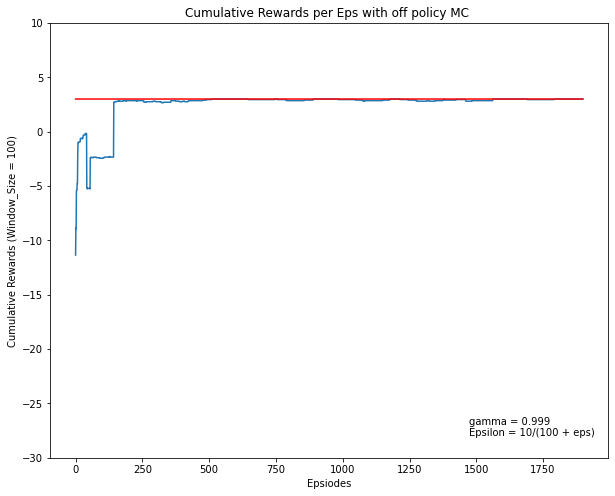

In [9]:
fig, ax = plt.subplots(1,1,figsize = (10,8))
ax.plot(Win_Rew_off_MC[100:])
ax.plot([3]*1900,'r')
ax.set_ylim((-30,10))
ax.set_xlabel("Epsiodes")
ax.set_ylabel("Cumulative Rewards (Window_Size = 100)")
ax.set_title("Cumulative Rewards per Eps with off policy MC ")
ax.text(x = 0.75, y = 0.05, s ="gamma = 0.999 \nEpsilon = 10/(100 + eps)", transform=ax.transAxes)
plt.show()

In [10]:
env.reset()

episode = []
rewards = []
n_done = 0

agent.set_current_state(44)
while n_done != 2: 
    s = agent.get_current_state()
    state, reward, done, info , action = agent.choose_action()
    print(s,state, reward, done, action)
    episode.append((s,action))
    rewards.append(reward)
    n_done += int(done)
print(len(episode)-1)

44 45 0.0 False 1
45 35 0.0 False 0
35 25 0.0 False 0
25 24 0.0 False 3
24 23 0.0 False 3
23 22 0.0 False 3
22 21 0.0 False 3
21 20 0.0 False 3
20 10 0.0 False 0
10 0 0.0 True 0
0 0 3.0 True 0
10


# SARSA

In [11]:
random.seed(2045)
env =  GridworldEnv()
env.reset()

num_episodes = 2000
states = list(range(100))
actions = [0,1,2,3]
Rewards = []
Win_Rew_SARSA = []
agent=SARSA_Agent('1',env,states,actions,epsilon = 0.5,learning_rate=0.2,gamma = 0.9,dec_eps = [10,100,1],dec_alph=[100,100,1])

for e in range(num_episodes):
    print("-"*25,"This is episode {} ".format(e),"-"*25,"\n")
    n_done = 0
    rewards = []
    episode = []
    env.reset()
    agent.set_current_state(44)
    S = agent.get_current_state()
    A = agent.choose_action()
    while n_done != 2: 
        S_prime, R, done, info = agent.take_action(A)
        A_prime = agent.choose_action()
        agent.update(R,S,A,S_prime,A_prime)
        n_done += int(done)
        episode.append((S,A))
        rewards.append(R)
        S = S_prime
        A = A_prime

    Rewards.append(sum(rewards))
    if e >= 100 : Win_Rew_SARSA.append((sum(rewards)+sum(Rewards[e-100:e]))/101)
    else: Win_Rew_SARSA.append(sum(rewards))
    print("The number of steps in episode is : {}".format(len(episode)-1))
    print("The sum of Rewards is : {} ".format(sum(rewards)),"\n" )
    agent.decay_epsilon()
    agent.decay_learning_rate()
env.close()

----------------------- This is episode 1863  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1864  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1865  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1866  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1867  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1868  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1869  ------------------------- 

The number of steps in episode is : 10
The sum of 

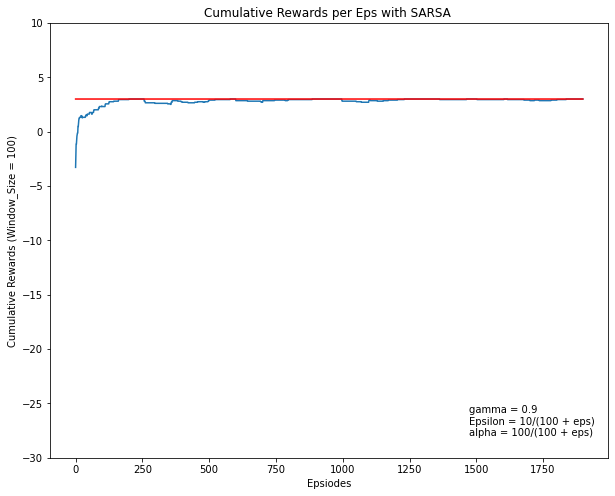

In [12]:
fig, ax = plt.subplots(1,1,figsize = (10,8))
ax.plot(Win_Rew_SARSA[100:])
ax.plot([3]*1900,'r')
ax.set_ylim((-30,10))
ax.set_xlabel("Epsiodes")
ax.set_ylabel("Cumulative Rewards (Window_Size = 100)")
ax.set_title("Cumulative Rewards per Eps with SARSA ")
ax.text(x = 0.75, y = 0.05, s ="gamma = 0.9 \nEpsilon = 10/(100 + eps) \nalpha = 100/(100 + eps)", transform=ax.transAxes)
plt.show()

# Double Q-Learning

In [13]:
random.seed(2045)
env =  GridworldEnv()
env.reset()

num_episodes = 2000
states = list(range(100))
actions = [0,1,2,3]
Rewards = []
Win_Rew_Double_Q = []
agent=Double_Q_Learning_Agent('1',env,states,actions,epsilon = 0.5,learning_rate=0.2,gamma= 0.999,dec_eps=[30,100,1],dec_alph=[100,100,1])

for e in range(num_episodes):
    print("-"*25,"This is episode {} ".format(e),"-"*25,"\n")
    n_done = 0
    rewards = []
    episode = []
    env.reset()
    agent.set_current_state(44)
    S = agent.get_current_state()
    while n_done != 2: 
        A = agent.choose_action()
        S_prime, R, done, info = agent.take_action(A)
        agent.update(R,S,A,S_prime)
        n_done += int(done)
        episode.append((S,A))
        rewards.append(R)
        S = S_prime

    Rewards.append(sum(rewards))
    if e >= 100 : Win_Rew_Double_Q.append((sum(rewards)+sum(Rewards[e-100:e]))/101)
    else: Win_Rew_Double_Q.append(sum(rewards))
    print("The number of steps in episode is : {}".format(len(episode)-1))
    print("The sum of Rewards is : {} ".format(sum(rewards)),"\n" )
    agent.decay_epsilon()
    agent.decay_learning_rate()
env.close()

--------------------- This is episode 1863  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1864  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1865  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1866  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1867  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1868  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1869  ------------------------- 

The number of steps in episode is : 10
The sum of Re

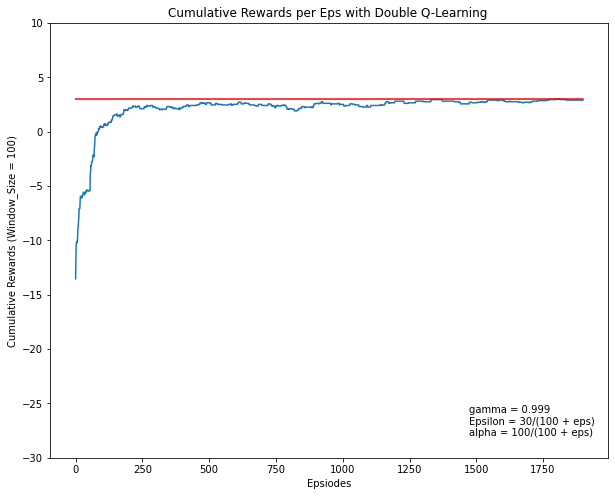

In [16]:
fig, ax = plt.subplots(1,1,figsize = (10,8))
ax.plot(Win_Rew_Double_Q[100:])
ax.plot([3]*1900,'r')
ax.set_ylim((-30,10))
ax.set_xlabel("Epsiodes")
ax.set_ylabel("Cumulative Rewards (Window_Size = 100)")
ax.set_title("Cumulative Rewards per Eps with Double Q-Learning ")
ax.text(x = 0.75, y = 0.05, s ="gamma = 0.999 \nEpsilon = 30/(100 + eps) \nalpha = 100/(100 + eps)", transform=ax.transAxes)
plt.show()

In [15]:
env.reset()

episode = []
rewards = []
n_done = 0

agent.set_current_state(44)
while n_done != 2: 
    s = agent.get_current_state()
    action = agent.choose_action()
    state, reward, done, info = agent.take_action(action)
    print(s,state, reward, done, action)
    episode.append((s,action))
    rewards.append(reward)
    n_done += int(done)
print(len(episode)-1)

44 45 0.0 False 1
45 35 0.0 False 0
35 25 0.0 False 0
25 24 0.0 False 3
24 23 0.0 False 3
23 22 0.0 False 3
22 12 0.0 False 0
12 2 0.0 False 0
2 1 0.0 False 3
1 0 0.0 True 3
0 0 3.0 True 1
10


# 2step Expected SARSA 

In [17]:
random.seed(2045)
env =  GridworldEnv()
env.reset()
 
num_episodes = 2000
states = list(range(100))
actions = [0,1,2,3]
Rewards = []
Win_Rew_2s_Exp_SARSA = []
agent = Two_step_Exp_SARSA_Agent('1',env,states,actions,epsilon = 0.5,learning_rate = 0.2,gamma = 0.9,dec_eps = [10,100,1],dec_alph=[100,100,1])

for e in range(num_episodes):
    print("-"*25,"This is episode {} ".format(e),"-"*25,"\n")
    n_done = 0
    rewards = []
    episode = []
    env.reset()
    agent.set_current_state(44)
    S0 = agent.get_current_state()
    A0 = agent.choose_action()
    S1, R1, done, info = agent.take_action(A0)
    
    while n_done != 2: 
        A1 = agent.choose_action()
        S2, R2, done1, info = agent.take_action(A1)
        agent.update(S0,A0,R1,S2,R2)
        n_done += int(done)
        episode.append((S0,A0))
        rewards.append(R1)
        S0 = S1
        A0 = A1 
        S1 = S2
        R1 = R2
        done = done1

    Rewards.append(sum(rewards))
    if e >= 100 : Win_Rew_2s_Exp_SARSA.append((sum(rewards)+sum(Rewards[e-100:e]))/101)
    else: Win_Rew_2s_Exp_SARSA.append(sum(rewards))
    print("The number of steps in episode is : {}".format(len(episode)-1))
    print("The sum of Rewards is : {} ".format(sum(rewards)),"\n" )
    agent.decay_epsilon()
    agent.decay_learning_rate()
env.close()

----------------------- This is episode 1863  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1864  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1865  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1866  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1867  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1868  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1869  ------------------------- 

The number of steps in episode is : 10
The sum of 

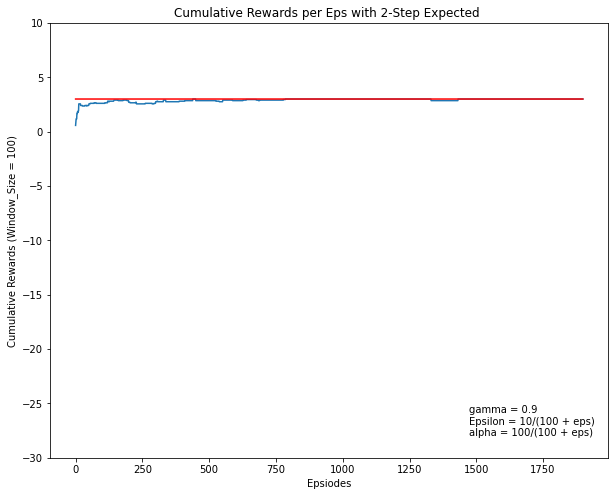

In [18]:
fig, ax = plt.subplots(1,1,figsize = (10,8))
ax.plot(Win_Rew_2s_Exp_SARSA[100:])
ax.plot([3]*1900,'r')
ax.set_ylim((-30,10))
ax.set_xlabel("Epsiodes")
ax.set_ylabel("Cumulative Rewards (Window_Size = 100)")
ax.set_title("Cumulative Rewards per Eps with 2-Step Expected ")
ax.text(x = 0.75, y = 0.05, s ="gamma = 0.9 \nEpsilon = 10/(100 + eps) \nalpha = 100/(100 + eps)", transform=ax.transAxes)
plt.show()

# n-Step Backup Tree 

## n = 1 

In [19]:
random.seed(2045)
env =  GridworldEnv()
env.reset()
 
num_episodes = 2000
states = list(range(100))
actions = [0,1,2,3]
Rewards = []
Win_Rew_1s_Tree = []
n = 1
agent =nStep_tree_backup_Agent('1',env,states,actions,n = 4,epsilon = 0.5,learning_rate = 0.2,gamma = 0.9,dec_eps = [10,100,1],dec_alph=[100,100,1])

for e in range(num_episodes):
    print("-"*25,"This is episode {} ".format(e),"-"*25,"\n")
    n_done = 0
    eps_rewards  = []
    eps_states = []
    eps_actions = []
    env.reset()
    agent.set_current_state(44)
    S0 = agent.get_current_state()
    A0 = agent.choose_action()
    eps_states.append(S0)
    eps_actions.append(A0)
    eps_rewards.append(0)
    T = 100000000000000000
    t = 0 

    while 0 == 0:
        if t < T :
            S_tp1, R_tp1 , done, info = agent.take_action(eps_actions[t])
            eps_states.append(S_tp1)
            eps_rewards.append(R_tp1)
            n_done += int(done)
            if n_done == 2 : 
                T = t + 1 
            else: 
                A_tp1 = agent.choose_action()
                eps_actions.append(A_tp1)
        tau = t + 1 - n 
        if tau >= 0:
            if t + 1 >= T :
                G = eps_rewards [-1]
            else:
                G =  agent.calculate_G_Expected(eps_rewards[t+1],eps_states[t+1])
            k = min(t,T-1)
            for x in range(k,tau,-1):
                G = agent.calculate_G_treebackup(eps_rewards[k],eps_states[k],eps_actions[k],G)
            agent.update_Q(G,eps_states[tau],eps_actions[tau])
        
        if tau == T - 1:
            break 
        t = t + 1
    Rewards.append(sum(eps_rewards))
    if e >= 100 : Win_Rew_1s_Tree.append((sum(eps_rewards)+sum(Rewards[e-100:e]))/101)
    else: Win_Rew_1s_Tree.append(sum(eps_rewards))
    print("The number of steps in episode is : {}".format(len(eps_states)-2))
    print("The sum of Rewards is : {} ".format(sum(eps_rewards)),"\n" )
    agent.decay_epsilon()
    agent.decay_learning_rate()
env.close()

--------------------- This is episode 1863  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1864  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1865  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1866  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1867  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1868  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1869  ------------------------- 

The number of steps in episode is : 10
The sum of Re

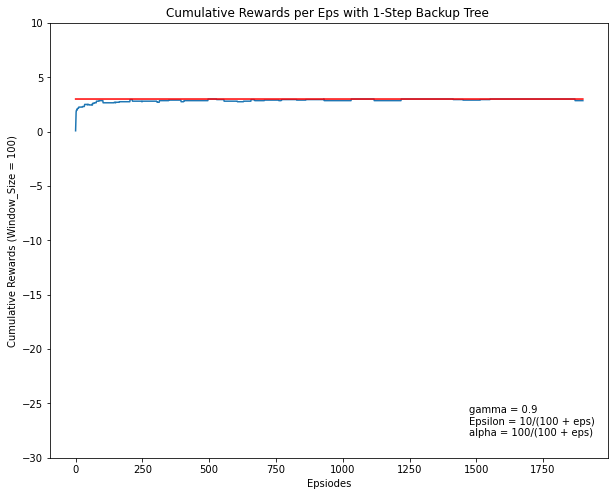

In [20]:
fig, ax = plt.subplots(1,1,figsize = (10,8))
ax.plot(Win_Rew_1s_Tree[100:])
ax.plot([3]*1900,'r')
ax.set_ylim((-30,10))
ax.set_xlabel("Epsiodes")
ax.set_ylabel("Cumulative Rewards (Window_Size = 100)")
ax.set_title("Cumulative Rewards per Eps with 1-Step Backup Tree ")
ax.text(x = 0.75, y = 0.05, s ="gamma = 0.9 \nEpsilon = 10/(100 + eps) \nalpha = 100/(100 + eps)", transform=ax.transAxes)
plt.show()

## n = 2

In [21]:
random.seed(2045)
env =  GridworldEnv()
env.reset()

num_episodes = 2000
states = list(range(100))
actions = [0,1,2,3]
Rewards = []
Win_Rew_2s_Tree = []
n = 2
agent =nStep_tree_backup_Agent('1',env,states,actions,n = 2,epsilon = 0.5,learning_rate = 0.2,gamma = 0.9,dec_eps = [10,200,1],dec_alph=[100,100,1])

for e in range(num_episodes):
    print("-"*25,"This is episode {} ".format(e),"-"*25,"\n")
    n_done = 0
    eps_rewards  = []
    eps_states = []
    eps_actions = []
    env.reset()
    agent.set_current_state(44)
    S0 = agent.get_current_state()
    A0 = agent.choose_action()
    eps_states.append(S0)
    eps_actions.append(A0)
    eps_rewards.append(0)
    T = 100000000000000000
    t = 0 

    while 0 == 0:
        if t < T :
            S_tp1, R_tp1 , done, info = agent.take_action(eps_actions[t])
            eps_states.append(S_tp1)
            eps_rewards.append(R_tp1)
            n_done += int(done)
            if n_done == 2 : 
                T = t + 1 
            else: 
                A_tp1 = agent.choose_action()
                eps_actions.append(A_tp1)
        tau = t + 1 - n 
        if tau >= 0:
            if t + 1 >= T :
                G = eps_rewards [-1]
            else:
                G =  agent.calculate_G_Expected(eps_rewards[t+1],eps_states[t+1])
            k = min(t,T-1)
            for x in range(k,tau,-1):
                G = agent.calculate_G_treebackup(eps_rewards[k],eps_states[k],eps_actions[k],G)
            agent.update_Q(G,eps_states[tau],eps_actions[tau])
        
        if tau == T - 1:
            break 
        t = t + 1

    Rewards.append(sum(eps_rewards))
    if e >= 100 : Win_Rew_2s_Tree.append((sum(eps_rewards)+sum(Rewards[e-100:e]))/101)
    else: Win_Rew_2s_Tree.append(sum(eps_rewards))
    print("The number of steps in episode is : {}".format(len(eps_states)-2))
    print("The sum of Rewards is : {} ".format(sum(eps_rewards)),"\n" )
    agent.decay_epsilon()
    agent.decay_learning_rate()
env.close()

----------------------- This is episode 1863  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1864  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1865  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1866  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1867  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1868  ------------------------- 

The number of steps in episode is : 10
The sum of Rewards is : 3.0  

------------------------- This is episode 1869  ------------------------- 

The number of steps in episode is : 10
The sum of 

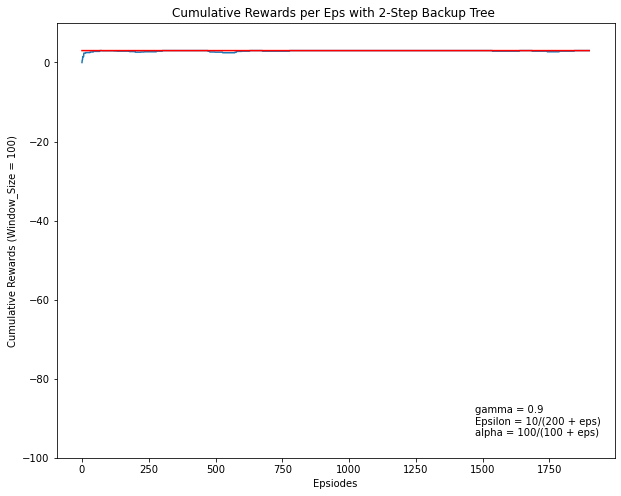

In [22]:
fig, ax = plt.subplots(1,1,figsize = (10,8))
ax.plot(Win_Rew_2s_Tree[100:])
ax.plot([3]*1900,'r')
ax.set_ylim((-100,10))
ax.set_xlabel("Epsiodes")
ax.set_ylabel("Cumulative Rewards (Window_Size = 100)")
ax.set_title("Cumulative Rewards per Eps with 2-Step Backup Tree ")
ax.text(x = 0.75, y = 0.05, s ="gamma = 0.9 \nEpsilon = 10/(200 + eps) \nalpha = 100/(100 + eps)", transform=ax.transAxes)
plt.show()

## n = 3

In [23]:
random.seed(2045)
env =  GridworldEnv()
env.reset()

num_episodes = 2000
states = list(range(100))
actions = [0,1,2,3]
Rewards = []
Win_Rew_3s_Tree = []
n = 3
agent =nStep_tree_backup_Agent('1',env,states,actions,n = 3,epsilon = 0.5,learning_rate = 0.2,gamma = 0.9,dec_eps = [1,50,1],dec_alph=[100,100,1])

for e in range(num_episodes):
    print("-"*25,"This is episode {} ".format(e),"-"*25,"\n")
    n_done = 0
    eps_rewards  = []
    eps_states = []
    eps_actions = []
    env.reset()
    agent.set_current_state(44)
    S0 = agent.get_current_state()
    A0 = agent.choose_action()
    eps_states.append(S0)
    eps_actions.append(A0)
    eps_rewards.append(0)
    T = 100000000000000000
    t = 0 

    while 0 == 0:
        if t < T :
            S_tp1, R_tp1 , done, info = agent.take_action(eps_actions[t])
            eps_states.append(S_tp1)
            eps_rewards.append(R_tp1)
            n_done += int(done)
            if n_done == 2 : 
                T = t + 1 
            else: 
                A_tp1 = agent.choose_action()
                eps_actions.append(A_tp1)
        tau = t + 1 - n 
        if tau >= 0:
            if t + 1 >= T :
                G = eps_rewards [-1]
            else:
                G =  agent.calculate_G_Expected(eps_rewards[t+1],eps_states[t+1])
            k = min(t,T-1)
            for x in range(k,tau,-1):
                G = agent.calculate_G_treebackup(eps_rewards[k],eps_states[k],eps_actions[k],G)
            agent.update_Q(G,eps_states[tau],eps_actions[tau])
        
        if tau == T - 1:
            break 
        t = t + 1


    Rewards.append(sum(eps_rewards))
    if e >= 100 : Win_Rew_3s_Tree.append((sum(eps_rewards)+sum(Rewards[e-100:e]))/101)
    else: Win_Rew_3s_Tree.append(sum(eps_rewards))
    print("The number of steps in episode is : {}".format(len(eps_states)-2))
    print("The sum of Rewards is : {} ".format(sum(eps_rewards)),"\n" )
    agent.decay_epsilon()
    agent.decay_learning_rate()
env.close()

----------------------- This is episode 1863  ------------------------- 

The number of steps in episode is : 20
The sum of Rewards is : 3.0  

------------------------- This is episode 1864  ------------------------- 

The number of steps in episode is : 20
The sum of Rewards is : 3.0  

------------------------- This is episode 1865  ------------------------- 

The number of steps in episode is : 20
The sum of Rewards is : 3.0  

------------------------- This is episode 1866  ------------------------- 

The number of steps in episode is : 20
The sum of Rewards is : 3.0  

------------------------- This is episode 1867  ------------------------- 

The number of steps in episode is : 20
The sum of Rewards is : 3.0  

------------------------- This is episode 1868  ------------------------- 

The number of steps in episode is : 20
The sum of Rewards is : 3.0  

------------------------- This is episode 1869  ------------------------- 

The number of steps in episode is : 20
The sum of 

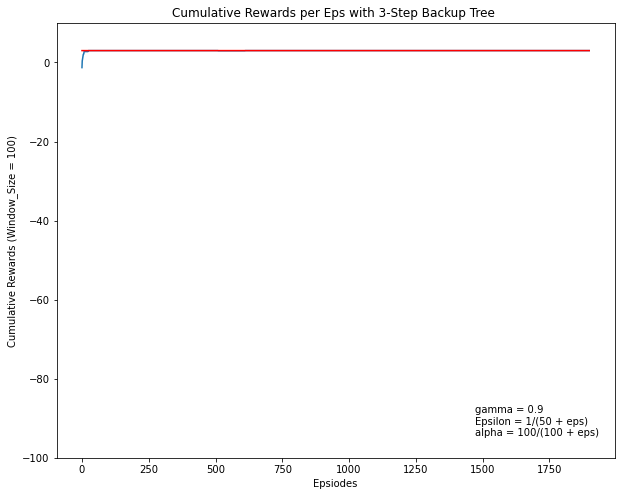

In [25]:
fig, ax = plt.subplots(1,1,figsize = (10,8))
ax.plot(Win_Rew_3s_Tree[100:])
ax.plot([3]*1900,'r')
ax.set_ylim((-100,10))
ax.set_xlabel("Epsiodes")
ax.set_ylabel("Cumulative Rewards (Window_Size = 100)")
ax.set_title("Cumulative Rewards per Eps with 3-Step Backup Tree ")
ax.text(x = 0.75, y = 0.05, s ="gamma = 0.9 \nEpsilon = 1/(50 + eps) \nalpha = 100/(100 + eps)", transform=ax.transAxes)
plt.show()

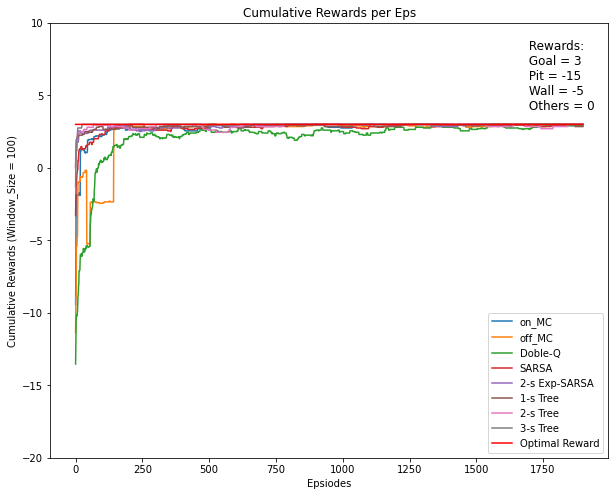

In [29]:
fig, ax = plt.subplots(1,1,figsize = (10,8))
ax.plot(Win_Rew_on_MC[100:])
ax.plot(Win_Rew_off_MC[100:])
ax.plot(Win_Rew_Double_Q[100:])
ax.plot(Win_Rew_SARSA[100:])
ax.plot(Win_Rew_2s_Exp_SARSA[100:])
ax.plot(Win_Rew_1s_Tree[100:])
ax.plot(Win_Rew_2s_Tree[100:])
ax.plot(Win_Rew_3s_Tree[100:])
ax.plot([3]*1900,'r-')
ax.set_ylim((-20,10))
ax.set_xlabel("Epsiodes")
ax.set_ylabel("Cumulative Rewards (Window_Size = 100)")
ax.set_title("Cumulative Rewards per Eps")
ax.legend(labels = ["on_MC","off_MC","Doble-Q","SARSA","2-s Exp-SARSA","1-s Tree","2-s Tree","3-s Tree","Optimal Reward"],loc = "lower right")
ax.text(x = 0.85, y = 0.80, s =" Rewards:\n Goal = 3\n Pit = -15\n Wall = -5\n Others = 0",fontsize=12, transform=ax.transAxes)
plt.show()